Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Graph Cut')

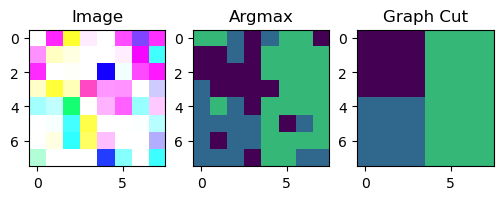

In [27]:
import numpy as np
from pygco import cut_simple
from PIL import Image
import matplotlib.pyplot as plt

def graph_cut(probabilities, d, k, lambda_):
    lambda_ = int(abs(lambda_) * -10)
    unary = 1 - probabilities.reshape(d, d, k)
    unary = (10 * unary).astype(np.int32)
    pairwise = lambda_ * np.eye(k, dtype=np.int32)
    result = cut_simple(unary, pairwise)
    result = result.reshape(d * d)
    return result

d = 8
k = 3
lambda_ = 1

image = np.zeros((d, d, k))
image[0:4, 0:4, 0] = 1
image[4:8, 0:4, 1] = 1
image[0:4, 4:8, 2] = 1
image[4:8, 4:8, 2] = 1
image += 2 * np.random.rand(d, d, k)


labels = graph_cut(image, d, k, lambda_)
labels = labels.reshape(d, d)

# create row of 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(6, 2))
axs[0].imshow(image)
axs[0].set_title('Image')
axs[1].imshow(image.argmax(axis=2), vmin=0, vmax=k)
axs[1].set_title('Argmax')
axs[2].imshow(labels, vmin=0, vmax=k)
axs[2].set_title('Graph Cut')